<a href="https://colab.research.google.com/github/Aditya9415/Data_Science_Projects/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [320]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('ex1data1.txt', delimiter=',')
X=data[:,0]; Y=data[:,1];
X=X.reshape((X.size,1));
Y=Y.reshape((Y.size,1));

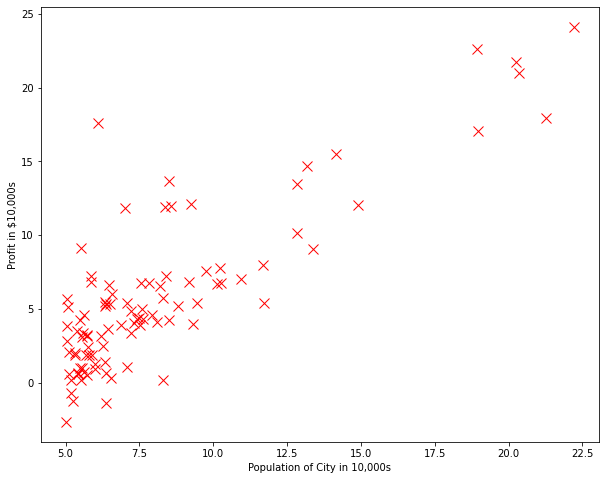

In [321]:
  fig, ax=plt.subplots()
  ax.plot(X, Y, 'rx',ms=10); # Plot the data  
  ax.set_ylabel('Profit in $10,000s'); # Set the y-axis label
  ax.set_xlabel('Population of City in 10,000s'); # Set the x-axis label

In [322]:
m = X.size;       # number of training examples
X = np.append(np.ones((m,1)),X,axis=1);       # Add a column of ones to x
theta = np.zeros((2,1));        # initialize fitting parameters
iterations = 1500;
alpha = 0.01;

In [ ]:
def computeCost(X,Y,theta):
  m = Y.size; # number of training examples
  sqDiff=X.dot(theta)-Y;
  J=np.mean(sqDiff**2)/2;
  return J;

In [ ]:
computeCost(X,Y,theta)

32.072733877455676

In [ ]:
computeCost(X, Y,[[-1], [2]])

54.24245508201238

In [ ]:
def gradientDescent(X, Y, theta, alpha, num_iters):
  m=Y.size;
  J_history = np.zeros((num_iters,1));
  for i in range(0,num_iters):

    tempX=X.dot(theta)-Y;  
    delta=(np.transpose(X).dot(tempX))/m; 
    theta=theta-(alpha*delta);

    J_history[i]=computeCost(X,Y,theta);

  return theta,J_history;

In [323]:
theta,J_history = gradientDescent(X, Y, theta, alpha, iterations);
theta

array([[-3.63029144],
       [ 1.16636235]])

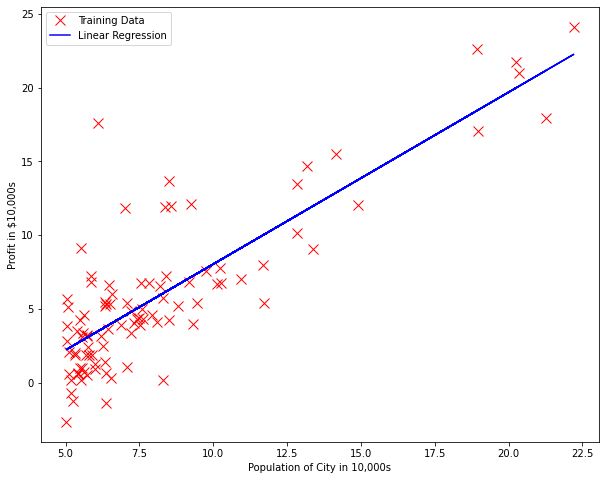

In [324]:
ax.plot(X[:,1], X.dot(theta), 'b-');
ax.legend(['Training Data','Linear Regression'])
fig

In [325]:
predict1 = np.array([1, 3.5]).dot(theta);
print('For population = 35,000, we predict a profit of', predict1*10000);

For population = 35,000, we predict a profit of [4519.7678677]


In [326]:
predict2 = np.array([1, 7]).dot(theta);
print('For population = 70,000, we predict a profit of ', predict2*10000);

For population = 70,000, we predict a profit of  [45342.45012945]


In [327]:
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.size,theta1_vals.size));

#Fill out J_vals
for i in range(theta0_vals.size):
  for j in range(theta1_vals.size):
    t = [[theta0_vals[i]], [theta1_vals[j]]];    
    J_vals[i,j] = computeCost(X, Y, t);

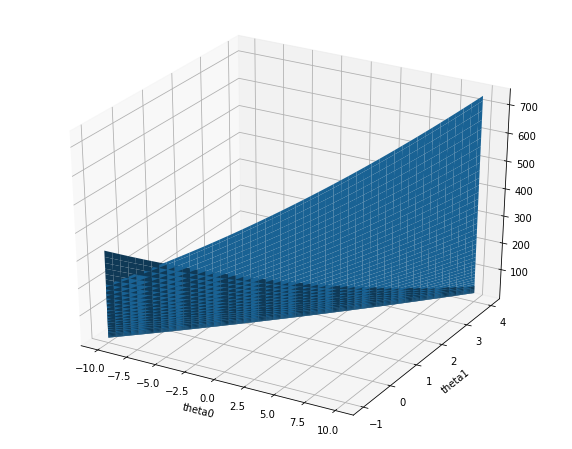

In [328]:
from matplotlib import rcParams
rcParams['figure.figsize']=10,8;
J_vals=np.transpose(J_vals);
fig,ax=plt.subplots(subplot_kw={"projection": "3d"});
ax.plot_surface(theta0_vals,theta1_vals,J_vals);
ax.set_xlabel('theta0');
ax.set_ylabel('theta1');

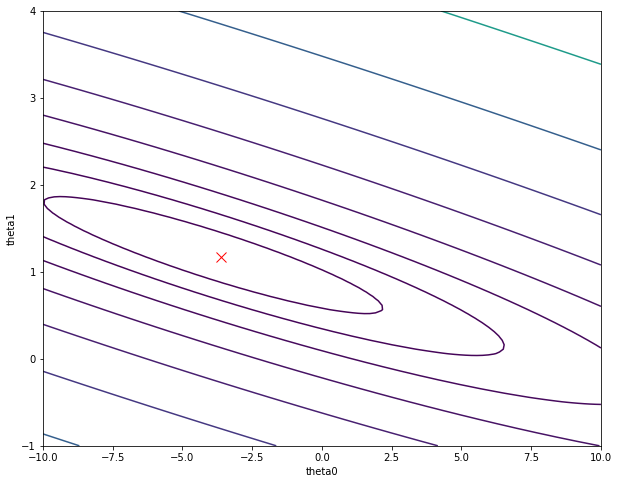

In [329]:
fig,ax=plt.subplots();
ax.contour(theta0_vals,theta1_vals,J_vals,np.logspace(-2, 3, 20));
ax.set_xlabel('theta0');
ax.set_ylabel('theta1');
ax.plot(theta[0],theta[1],'rx',ms=10,lw=2)

## *This Concludes our Project on Gradient Descent*



